In [1]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy.wcs.utils import skycoord_to_pixel as stp
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table
import numpy as np
from astropy.table import Table
import pandas as pd
import pandas
from astropy import coordinates as coords
from scipy.optimize import curve_fit

In [2]:
file = "wcdfs.v1_csv.csv"
df1 = pd.read_csv(file)
file = "table_irsa_catalog_search_results.csv"
df2 = pd.read_csv(file)

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   3.,   1.,
          6.,   1.,   4.,   2.,   6.,  13.,  17.,  22.,  27.,  27.,  43.,
         49.,  48.,  60.,  57.,  57.,  78.,  54.,  68.,  55.,  77.,  54.,
         55.,  79.,  67.,  55.,  57.,  68.,  59.,  56.,  64.,  74.,  83.,
         68.,  92., 101., 114., 115., 140., 169., 160., 200., 189., 190.,
        180., 223., 184., 200., 180., 175., 167., 167., 140., 130., 113.,
         79.,  69.,  62.,  53.,  47.,  45.,  31.,  23.,  18.,  21.,  16.,
          9.,   4.,   7.,   6.,   8.,   7.,   3.,   0.,   3.,   1.,   1.,
          2.,   3.,   1.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          1.]),
 array([-4.74825572e-01, -4.35275809e-01, -3.95726046e-01, -3.56176283e-01,
        -3.16626520e-01, -2.77076757e-01, -2.37526994e-01, -1.97977231e-01,
        -1.58427468e-01, -1.18877705e-01, -7.93279424e-02, -3.97781794e-02,
        -2.28416472e-04,  3.93213465e-02,  7.88711095e-02,  1.18420872e-01,
         1.579

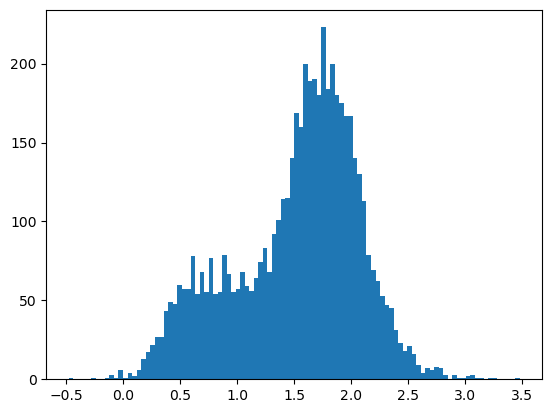

In [3]:
plt.hist(np.log10(df2["i1_f_ap2"]), bins = 100)
#plt.xlim(0,7.5)

In [4]:
flux_limit = 10**1.09
flux_limit

12.302687708123818

In [5]:
df2_filtered = df2[df2['i1_f_ap2'] > 12.302687708123818]

# Display the filtered DataFrame
print(df2_filtered)

      cntr_01    dist_x      pang_x      ra_01     dec_01  \
1           2  0.038505   53.175044  53.713051 -28.720795   
2           3  0.083302  -35.155917  53.981705 -28.720930   
3           4  0.205416  155.595691  54.117352 -28.720589   
4           5  0.151644   45.187166  53.397133 -28.712641   
5           6  0.254714   68.158440  53.520683 -28.718418   
...       ...       ...         ...        ...        ...   
5793     5794  0.749126   95.534221  51.788929 -27.157316   
5809     5810  0.734004   90.943675  52.860870 -27.171986   
5810     5811  0.732902   25.805493  53.736004 -28.650379   
5811     5812  0.055746  -30.549497  53.862202 -28.647921   
5812     5813  0.459565 -162.581290  53.956516 -28.647339   

                           objid  crowded  badbkgmatch         ra        dec  \
1     SSTSL2 J033451.13-284314.8      0.0          0.0  53.713061 -28.720788   
2     SSTSL2 J033555.60-284315.2      0.0          0.0  53.981690 -28.720911   
3     SSTSL2 J033628.17-284

In [6]:
df2_filtered = df2_filtered.rename(columns={'ra': 'RA', 'dec': 'DEC'})
common_columns = ['RA', 'DEC']

In [7]:
coords_df1 = SkyCoord(ra=df1['RA'].values * u.deg, dec=df1['DEC'].values * u.deg)
coords_df2_filtered = SkyCoord(ra=df2_filtered['RA'].values * u.deg, dec=df2_filtered['DEC'].values * u.deg)

# Match df2_filtered to df1 within a 3 arcsecond tolerance
idx, d2d, _ = coords_df2_filtered.match_to_catalog_sky(coords_df1)
tolerance = 3  # in arcseconds

# Filter matches within the tolerance
matched = d2d.arcsec < tolerance

# Create matched DataFrames
df2_filtered_matched = df2_filtered[matched].reset_index(drop=True)
df1_matched = df1.iloc[idx[matched]].reset_index(drop=True)

# Combine the matched DataFrames
merged_df = pd.concat([df2_filtered_matched, df1_matched], axis=1)

# Print the number of common sources
print(f"Number of common sources with tolerance: {len(merged_df)}")

Number of common sources with tolerance: 4226


In [8]:
columns_list = merged_df.columns.tolist()

# Find the first occurrence of 'RA' and rename it
columns_list[columns_list.index('RA')] = 'RA_1'

# Assign the updated list back to the DataFrame
merged_df.columns = columns_list

# Step 3: Check the updated column names
print("Updated columns:", merged_df.columns)

Updated columns: Index(['cntr_01', 'dist_x', 'pang_x', 'ra_01', 'dec_01', 'objid', 'crowded',
       'badbkgmatch', 'RA_1', 'DEC',
       ...
       'U_V_gal', 'U_V_gal_err', 'FUV_V_gal', 'FUV_V_gal_err', 'fracagn',
       'fracagn_err', 'logL_6um_AGN', 'rSFR', 'rSFR_err', 'ngoodband'],
      dtype='object', length=206)


In [9]:
columns_list = merged_df.columns.tolist()

# Find the first occurrence of 'RA' and rename it
columns_list[columns_list.index('DEC')] = 'DEC_1'

# Assign the updated list back to the DataFrame
merged_df.columns = columns_list

# Step 3: Check the updated column names
print("Updated columns:", merged_df.columns)

Updated columns: Index(['cntr_01', 'dist_x', 'pang_x', 'ra_01', 'dec_01', 'objid', 'crowded',
       'badbkgmatch', 'RA_1', 'DEC_1',
       ...
       'U_V_gal', 'U_V_gal_err', 'FUV_V_gal', 'FUV_V_gal_err', 'fracagn',
       'fracagn_err', 'logL_6um_AGN', 'rSFR', 'rSFR_err', 'ngoodband'],
      dtype='object', length=206)


In [10]:
ecdfs_center = coords.SkyCoord(ra=53.11779166666667, dec=-27.806055555555556, unit=(u.deg, u.deg), frame='icrs')

# Define the radius of the region (6 arcminutes)
radius = 6 * u.arcmin

galaxy_coordinates2 = coords.SkyCoord(merged_df['RA'], merged_df['DEC'], unit=(u.deg, u.deg), frame='icrs')
galaxies_in_ecdfs2 = merged_df[galaxy_coordinates2.separation(ecdfs_center).arcmin < radius.value]
#midir_agn_df = galaxies_in_ecdfs2[( (galaxies_in_ecdfs2['flag_IRagn_D12'] == 1)|(galaxies_in_ecdfs2['flag_IRagn_S05'] == 1) | (galaxies_in_ecdfs2['flag_IRagn_L07'] == 1)) 
    
    
#]
#print(len(midir_agn_df))

In [11]:
galaxies_in_ecdfs2.to_csv("filtered_data_deep.csv", index=False)

(array([75.,  8.,  0.,  8.,  5.,  3.,  4.,  3., 13.,  3.,  5.,  5.,  5.,
         8.,  6., 12.,  8., 12.,  5.,  9.,  5.,  2.,  6.,  3.,  4.,  4.,
         4.,  2.,  5.,  2.,  3.,  5.,  3.,  1.,  1.,  3.,  4.,  4.,  2.,
         2.,  0.,  1.,  2.,  1.,  2.,  1.,  0.,  0.,  0.,  1.]),
 array([ 0.14131443,  1.08165231,  2.02199019,  2.96232806,  3.90266594,
         4.84300382,  5.7833417 ,  6.72367958,  7.66401745,  8.60435533,
         9.54469321, 10.48503109, 11.42536897, 12.36570684, 13.30604472,
        14.2463826 , 15.18672048, 16.12705836, 17.06739623, 18.00773411,
        18.94807199, 19.88840987, 20.82874775, 21.76908562, 22.7094235 ,
        23.64976138, 24.59009926, 25.53043714, 26.47077501, 27.41111289,
        28.35145077, 29.29178865, 30.23212653, 31.1724644 , 32.11280228,
        33.05314016, 33.99347804, 34.93381592, 35.87415379, 36.81449167,
        37.75482955, 38.69516743, 39.63550531, 40.57584318, 41.51618106,
        42.45651894, 43.39685682, 44.3371947 , 45.27753257,

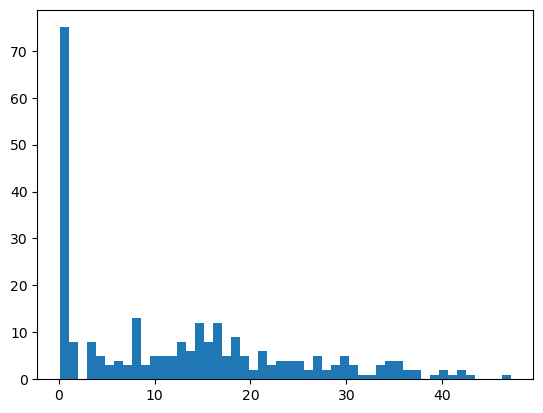

In [54]:
musyc2 = np.genfromtxt("xray_agns_y.csv", names = True, delimiter = ',')
irvars2 = np.genfromtxt("filtered_data_deep.csv", names = True, delimiter = ',', dtype = None, encoding = None)
ra1 = irvars2["RA"]
dec1 = irvars2["DEC"]
ra2 = musyc2["RA"]
dec2 = musyc2["DEC"]
coo1 = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
coo2 = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree)
clean = (~np.isnan(coo1.ra)& ~np.isnan(coo1.dec))
coo1_clean = coo1[clean]
idx, d2d, d3d = coo1_clean.match_to_catalog_sky(coo2)
#print(coo1_clean)
plt.hist(d2d.arcsec, bins =50, label = "Data")

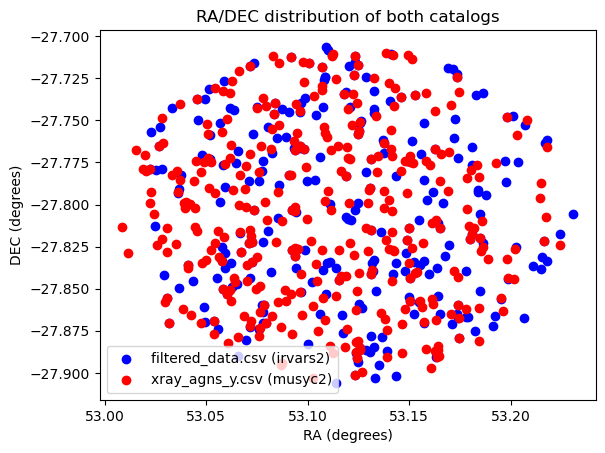

In [55]:
plt.scatter(ra1, dec1, color='blue', label='filtered_data.csv (irvars2)')
plt.scatter(ra2, dec2, color='red', label='xray_agns_y.csv (musyc2)')
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.legend()
plt.title('RA/DEC distribution of both catalogs')
plt.show()

(0.0, 1.0)

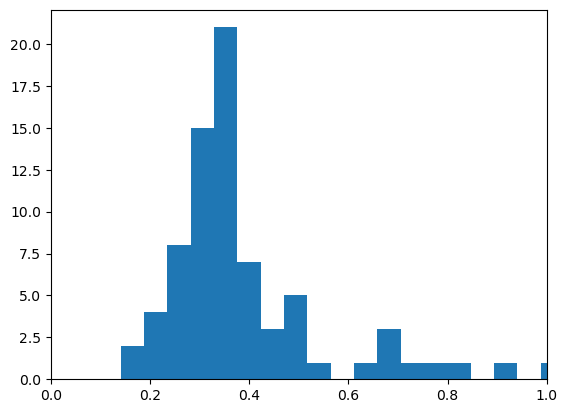

In [58]:
plt.hist(d2d.arcsec, bins =1000, label = "Data")
plt.xlim(0,1)

In [60]:
limit_condition = d2d.arcsec < 1

# Extract indices where the condition is satisfied
valid_indices2 = np.where(limit_condition)[0]

# Ensure valid indices are within the bounds of your arrays
#valid_indices = valid_indices[(valid_indices < len(coo1.ra)) | (valid_indices < len(coo2.dec))]

# Extract values using valid indices
ra_values = coo1.ra[valid_indices2].to(u.deg).value
dec_values = coo2.dec[idx[valid_indices2]].to(u.deg).value

# Create DataFrame
data55 = {'Extracted RA': ra_values, 'Extracted Dec': dec_values}
df55 = pd.DataFrame(data55)
df55

,Extracted RA,Extracted Dec
0,53.125690,-27.884969
1,53.071575,-27.872429
2,53.174099,-27.859760
3,53.078518,-27.859804
4,53.195091,-27.855704
...,...,...
69,53.022331,-27.778865
70,53.094059,-27.804112
71,53.150681,-27.774467
72,53.092396,-27.826766


In [62]:
irvars2_valid = irvars2[valid_indices2]
d_midir = irvars2_valid[
    ( (irvars2_valid['flag_IRagn_D12'] == 1) |(irvars2_valid['flag_IRagn_L07'] == 1) | (irvars2_valid['flag_IRagn_S05'] == 1) )
    
]
len(d_midir)

73

(array([26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.20464582,  0.69899895,  1.19335207,  1.68770519,  2.18205832,
         2.67641144,  3.17076456,  3.66511769,  4.15947081,  4.65382393,
         5.14817706,  5.64253018,  6.1368833 ,  6.63123643,  7.12558955,
         7.61994267,  8.1142958 ,  8.60864892,  9.10300204,  9.59735517,
        10.09170829, 10.58606141, 11.08041454, 11.57476766, 12.06912078,
        12.56347391, 13.05782703, 13.55218015, 14.04653327, 14.5408864 ,
        15.03523952, 15.52959264, 16.02394577, 16.51829889, 17.01265201,
        17.50700514, 18.00135826, 18.49571138, 18.99006451, 19.48441763,
        19.97877075, 20.47312388, 20.967477  , 21.46183012, 21.95618325,
        22.45053637, 22.94488949, 23.43924262, 23.93359574,

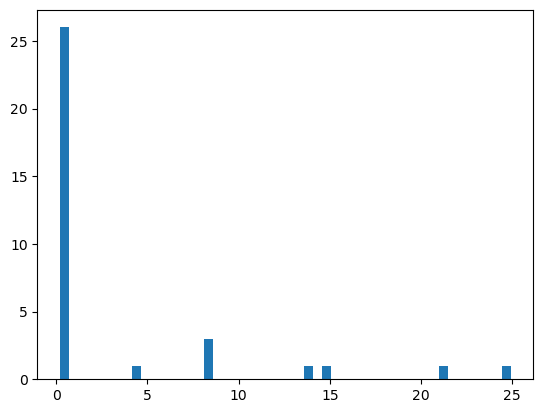

In [34]:
musyc1 = np.genfromtxt("xray_agns_y.csv", names = True, delimiter = ',')
irvars1 = np.genfromtxt("zou_reliableagn_sixarc1.csv", names = True, delimiter = ',', dtype = None, encoding = None)
ra1 = irvars1["RA"]
dec1 = irvars1["DEC"]
ra2 = musyc1["RA"]
dec2 = musyc1["DEC"]
coo1 = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
coo2 = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree)
clean = (~np.isnan(coo1.ra)& ~np.isnan(coo1.dec))
coo1_clean = coo1[clean]
idx, d2d, d3d = coo1_clean.match_to_catalog_sky(coo2)
#print(coo1_clean)
plt.hist(d2d.arcsec, bins =50, label = "Data")

In [36]:
limit_condition = d2d.arcsec < 1

# Extract indices where the condition is satisfied
valid_indices1 = np.where(limit_condition)[0]

# Ensure valid indices are within the bounds of your arrays
#valid_indices = valid_indices[(valid_indices < len(coo1.ra)) | (valid_indices < len(coo2.dec))]

# Extract values using valid indices
ra_values = coo1.ra[valid_indices1].to(u.deg).value
dec_values = coo2.dec[idx[valid_indices1]].to(u.deg).value

# Create DataFrame
data555 = {'Extracted RA': ra_values, 'Extracted Dec': dec_values}
df555 = pd.DataFrame(data555)
df555

,Extracted RA,Extracted Dec
0,53.157314,-27.870054
1,53.155529,-27.857572
2,53.058399,-27.850128
3,53.097256,-27.865787
4,53.180107,-27.820595
5,53.149868,-27.813978
6,53.036137,-27.792852
7,53.124886,-27.758309
8,53.076881,-27.765534
9,53.146206,-27.736293


In [38]:
irvars1_valid = irvars1[valid_indices1]
d_reliable = irvars1_valid[
    ( (irvars1_valid['flag_reliablesedagn'] == 1) ) 
    
]
len(d_reliable)

26

In [40]:
irvars1_valid = irvars1[valid_indices1]
d_xray = irvars1_valid[
    ( (irvars1_valid['flag_Xrayagn'] == 1) ) 
    
]
len(d_xray)

10

In [42]:
reliable_agnr = irvars1["flag_reliablesedagn"][valid_indices1]
flagXray_agnr = irvars1["flag_Xrayagn"][valid_indices1]
flag_S05r = irvars2["flag_IRagn_S05"][valid_indices2]
flag_L07r = irvars2["flag_IRagn_L07"][valid_indices2]
flag_D12r = irvars2["flag_IRagn_D12"][valid_indices2]
Mstar_galr = irvars1["Mstar_gal"][valid_indices1]

In [44]:
file = "xray_agns_y.csv"
df100 = pd.read_csv(file)
Mstar_xray = 10 ** (0.5 * np.log10(df100['LX_INT']) - 10.5)

C:\Users\reina\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [46]:
df_reliable = pd.DataFrame({'RA': ra_values, 
                            'DEC': dec_values,
                            'Reliable SED AGN': reliable_agnr})
print(df_reliable)

           RA        DEC  Reliable SED AGN
0   53.157314 -27.870054                 1
1   53.155529 -27.857572                 1
2   53.058399 -27.850128                 1
3   53.097256 -27.865787                 1
4   53.180107 -27.820595                 1
5   53.149868 -27.813978                 1
6   53.036137 -27.792852                 1
7   53.124886 -27.758309                 1
8   53.076881 -27.765534                 1
9   53.146206 -27.736293                 1
10  53.152920 -27.735139                 1
11  53.045494 -27.737467                 1
12  53.123466 -27.711805                 1
13  53.125874 -27.751285                 1
14  53.174335 -27.867327                 1
15  53.093925 -27.767736                 1
16  53.067371 -27.828226                 1
17  53.162800 -27.767166                 1
18  53.137547 -27.763181                 1
19  53.117805 -27.734267                 1
20  53.138630 -27.710060                 1
21  53.106998 -27.718233                 1
22  53.0793

In [48]:
coords_df100 = SkyCoord(ra=df100['RA'].values * u.deg, dec=df100['DEC'].values * u.deg)
coords_df_reliable = SkyCoord(ra=df_reliable['RA'].values * u.deg, dec=df_reliable['DEC'].values * u.deg)

# Match the sources within a small tolerance (e.g., 1 arcsecond)
idx, d2d, d3d = coords_df100.match_to_catalog_sky(coords_df_reliable)

# Apply the tolerance (in arcseconds)
tolerance = 1.0 * u.arcsec  # You can adjust this value based on your needs
matches_within_tolerance = d2d < tolerance

# Add a column to df100 indicating whether the match was within the tolerance
df100['matched_reliable'] = matches_within_tolerance

# Merge the two datasets based on the matched indices
df_combined = df100[matches_within_tolerance].merge(df_reliable, left_index=True, right_index=True, how='left')

# Check the number of reliable SED AGN sources after merging
print(f"Number of reliable SED AGN sources after merging: {df_combined['matched_reliable'].sum()}")

Number of reliable SED AGN sources after merging: 26


In [64]:
df_midir = pd.DataFrame({'RA': ra_values, 
                            'DEC': dec_values,
                         'S05': flag_S05r,
                         'L07': flag_L07r, 
                         'D12': flag_D12r,})
df_midir

,RA,DEC,S05,L07,D12
0,53.125690,-27.884969,0,1,0
1,53.071575,-27.872429,0,0,0
2,53.174099,-27.859760,0,1,0
3,53.078518,-27.859804,1,1,0
4,53.195091,-27.855704,1,1,0
...,...,...,...,...,...
69,53.022331,-27.778865,1,1,1
70,53.094059,-27.804112,0,1,0
71,53.150681,-27.774467,0,1,0
72,53.092396,-27.826766,1,1,0


In [66]:
coords_df100 = SkyCoord(ra=df100['RA'].values * u.deg, dec=df100['DEC'].values * u.deg)
coords_df_mid_ir = SkyCoord(ra=df_midir['RA'].values * u.deg, dec=df_midir['DEC'].values * u.deg)

# Match the sources within a small tolerance (e.g., 1 arcsecond)
idx_mid_ir, d2d_mid_ir, d3d_mid_ir = coords_df100.match_to_catalog_sky(coords_df_mid_ir)

# Apply the tolerance (in arcseconds)
tolerance = 1.0 * u.arcsec  # Adjust this value as necessary
matches_within_tolerance_mid_ir = d2d_mid_ir < tolerance

# Add a column to df100 indicating whether the mid-IR match was within the tolerance
df100['matched_mid_ir'] = matches_within_tolerance_mid_ir

# Check the number of mid-IR sources matched
print(f"Number of mid-IR sources matched: {df100['matched_mid_ir'].sum()}")

Number of mid-IR sources matched: 74


In [50]:
df_xrayy = pd.DataFrame({'RA': ra_values, 
                            'DEC': dec_values,
                            'Xray AGN':flagXray_agnr })
df_xray = df_xrayy[(df_xrayy['Xray AGN'] == 1)]
df_xray

,RA,DEC,Xray AGN
0,53.157314,-27.870054,1
2,53.058399,-27.850128,1
4,53.180107,-27.820595,1
6,53.036137,-27.792852,1
7,53.124886,-27.758309,1
10,53.152920,-27.735139,1
11,53.045494,-27.737467,1
13,53.125874,-27.751285,1
14,53.174335,-27.867327,1
17,53.162800,-27.767166,1


In [52]:
coords_df100 = SkyCoord(ra=df100['RA'].values * u.deg, dec=df100['DEC'].values * u.deg)
coords_df_xray = SkyCoord(ra=df_xray['RA'].values * u.deg, dec=df_xray['DEC'].values * u.deg)

# Match the sources within a small tolerance (e.g., 1 arcsecond)
idx_xray, d2d_xray, d3d_xray = coords_df100.match_to_catalog_sky(coords_df_xray)

# Apply the tolerance (in arcseconds)
tolerance = 1.0 * u.arcsec  # Adjust this value as necessary
matches_within_tolerance_xray = d2d_xray < tolerance

# Add a column to df100 indicating whether the mid-IR match was within the tolerance
df100['matched_xray'] = matches_within_tolerance_xray

# Check the number of mid-IR sources matched
print(f"Number of mid-IR sources matched: {df100['matched_xray'].sum()}")

Number of mid-IR sources matched: 10


In [68]:
df100.columns 

Index(['ID', 'RA', 'DEC', 'LOGPB', 'WAVDETECT', 'SIGMAX', 'AXIS_ANGLE',
       'FB_COUNTS', 'FB_LE', 'FB_UE', 'SB_COUNTS', 'SB_LE', 'SB_UE',
       'HB_COUNTS', 'HB_LE', 'HB_UE', 'PHO_NOTE', 'CP_CAT', 'CP_OFFSET',
       'CP_NOTE', 'WFI_RA', 'WFI_DEC', 'WFI_MAG', 'GOODSS_RA', 'GOODSS_DEC',
       'GOODSS_MAG', 'GEMS_RA', 'GEMS_DEC', 'GEMS_MAG', 'CANDELS_RA',
       'CANDELS_DEC', 'CANDELS_MAG', 'TENIS_RA', 'TENIS_DEC', 'TENIS_MAG',
       'SEDS_RA', 'SEDS_DEC', 'SEDS_MAG', 'VLA_RA', 'VLA_DEC', 'VLA_MAG',
       'ZSPEC', 'ZQUAL', 'ZSPEC_REF', 'ZPHOTL10', 'ZPHOTR11', 'ZPHOTH14',
       'ZPHOTS14', 'ZPHOTS15', 'ZPHOTS16', 'ZFINAL', 'ZFINAL_REF', 'ZFINAL_LE',
       'ZFINAL_UE', 'FB_EXPTIME', 'SB_EXPTIME', 'HB_EXPTIME', 'BANDRATIO',
       'BANDRATIO_LE', 'BANDRATIO_UE', 'PGAMMA', 'PGAMMA_LE', 'PGAMMA_UE',
       'FB_FLUX', 'SB_FLUX', 'HB_FLUX', 'LX_APP', 'NH', 'LX_INT', 'TYPE',
       'X11ID', 'X16ID', 'R13ID', 'matched_reliable', 'matched_xray',
       'matched_mid_ir'],
      dtype='obj

Reliable SED AGNs in this bin: 0
Mid-IR AGNs in this bin: 0
X-ray AGNs in this bin: 0
Bin: 9.25, Total X-ray Sources: 3
 AGN fraction: 0.0
Reliable SED AGNs in this bin: 1
Mid-IR AGNs in this bin: 1
X-ray AGNs in this bin: 0
Bin: 9.75, Total X-ray Sources: 16
 AGN fraction: 0.125
Reliable SED AGNs in this bin: 2
Mid-IR AGNs in this bin: 10
X-ray AGNs in this bin: 1
Bin: 10.25, Total X-ray Sources: 59
 AGN fraction: 0.1864406779661017
Reliable SED AGNs in this bin: 8
Mid-IR AGNs in this bin: 28
X-ray AGNs in this bin: 0
Bin: 10.75, Total X-ray Sources: 141
 AGN fraction: 0.22695035460992907
Reliable SED AGNs in this bin: 7
Mid-IR AGNs in this bin: 22
X-ray AGNs in this bin: 3
Bin: 11.25, Total X-ray Sources: 90
 AGN fraction: 0.26666666666666666
Reliable SED AGNs in this bin: 8
Mid-IR AGNs in this bin: 13
X-ray AGNs in this bin: 6
Bin: 11.75, Total X-ray Sources: 28
 AGN fraction: 0.4642857142857143


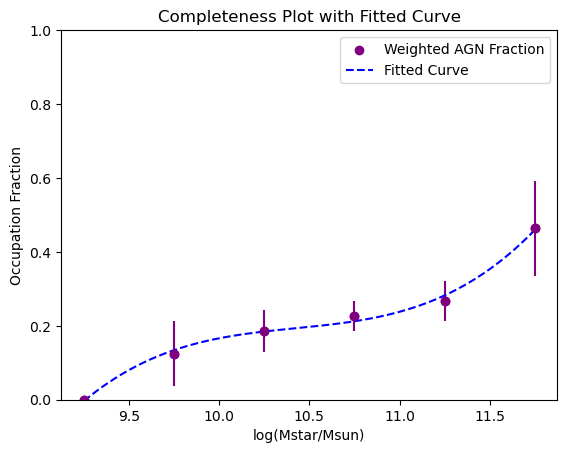

In [70]:
i = 9  # Starting log(Mstar) value
binsize = 0.5  # Size of each bin
bins_list = []
weighted_avg_frac_list = []
error_list = []
# Loop through the bins and calculate the weighted average fraction for all AGN types
while i < 12:
    # Define conditions for sources in the current bin
    #w_total = (np.log10(df100['Mstar_xray']) > i) & (np.log10(df100['Mstar_xray']) < i + binsize)
    w_total = (np.log10(Mstar_xray) > i) & (np.log10(Mstar_xray) < i + binsize)
    # Condition for reliable SED AGN, mid-IR, and X-ray sources in the current bin
    w_reliable = w_total & (df100['matched_reliable'] == 1)
    w_mid_ir = w_total & (df100['matched_mid_ir'] == 1)
    w_xray = w_total & (df100['matched_xray'] == 1)
    
    w2 = w_reliable | w_mid_ir | w_xray
    icount_agn = np.sum(w2)
    print(f"Reliable SED AGNs in this bin: {np.sum(w_reliable)}")
    print(f"Mid-IR AGNs in this bin: {np.sum(w_mid_ir)}")
    print(f"X-ray AGNs in this bin: {np.sum(w_xray)}")
    # Count the number of sources in the bin
    count_total = np.sum(w_total)
    #count_reliable = np.sum(w_reliable)
    #count_mid_ir = np.sum(w_mid_ir)
    #count_xray = np.sum(w_xray)
    
    # Calculate completeness fractions for each AGN type
    if count_total > 0:
        frac_agn = icount_agn / count_total
        #frac_reliable = count_reliable / count_total
        #frac_mid_ir = count_mid_ir / count_total
        #frac_xray = count_xray / count_total
        
        # Weighted average calculation
    
        weighted_avg_frac = frac_agn 
        
        # Calculate error as standard deviation (this is an approximation)
        #frac_list = [frac_agn]
        error = np.sqrt(icount_agn) / count_total 
    
    
    # Store results for plotting
    bin_center = i + 0.5 * binsize
    bins_list.append(bin_center)
    weighted_avg_frac_list.append(weighted_avg_frac)
    error_list.append(error)
    print(f"Bin: {bin_center}, Total X-ray Sources: {count_total}")
    print(f" AGN fraction: {weighted_avg_frac}")
    # Increment to the next bin
    i += binsize

# Convert lists to arrays for plotting
bins_array = np.array(bins_list)
weighted_avg_frac_array = np.array(weighted_avg_frac_list)
error_array = np.array(error_list)

# Create the scatter plot for the weighted averaged fractions
plt.scatter(bins_array, weighted_avg_frac_array, color='purple', label='Weighted AGN Fraction')
plt.errorbar(bins_array, weighted_avg_frac_array, yerr=error_array, fmt='o', color='purple')

# Fit a parabola (degree 2 polynomial) to the weighted averaged fractions
fit_params = np.polyfit(bins_array, weighted_avg_frac_array, 3)
x_fit = np.linspace(min(bins_array), max(bins_array), 500)
y_fit = np.polyval(fit_params, x_fit)

# Plot the fitted curve
plt.plot(x_fit, y_fit, color='blue', linestyle='--', label='Fitted Curve')

# Customize the plot
plt.title('Completeness Plot with Fitted Curve')
plt.xlabel("log(Mstar/Msun)")
plt.ylabel("Occupation Fraction")
plt.legend()
plt.ylim(0, 1)  # Set y-axis to 0-1 range
plt.show()

Bin: 9.25, Total X-ray Sources: 3
AGN fraction: 0.0
Bin: 9.75, Total X-ray Sources: 16
AGN fraction: 0.125
Bin: 10.25, Total X-ray Sources: 59
AGN fraction: 0.1864406779661017
Bin: 10.75, Total X-ray Sources: 141
AGN fraction: 0.22695035460992907
Bin: 11.25, Total X-ray Sources: 90
AGN fraction: 0.26666666666666666
Bin: 11.75, Total X-ray Sources: 28
AGN fraction: 0.4642857142857143


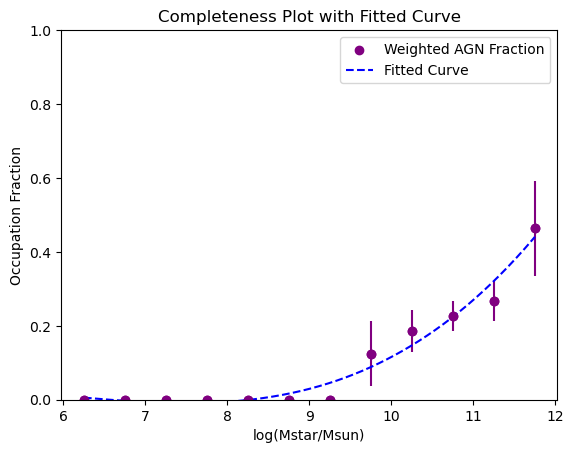

In [89]:
#completeness plot including fraction of lower masses
i = 9  # Starting log(Mstar) value for data-derived bins
binsize = 0.5  # Size of each bin
bins_list = []
weighted_avg_frac_list = []
error_list = []

# Manually add forced fractions for log(Mstar) between 6 and 9
forced_bins = [6.25, 6.75, 7.25, 7.75, 8.25, 8.75]  # Bin centers in the range 6 to 9
forced_fractions = [0, 0, 0, 0, 0, 0]  # Forced low fractions
forced_errors = [0] * len(forced_bins)  # No errors or very small errors for forced values

# Add the forced fractions to the lists for plotting
bins_list.extend(forced_bins)
weighted_avg_frac_list.extend(forced_fractions)
error_list.extend(forced_errors)

# Now proceed with your normal loop for i >= 9 (for actual data)
while i < 12:
    # Define conditions for sources in the current bin
    w_total = (np.log10(Mstar_xray) > i) & (np.log10(Mstar_xray) < i + binsize)
    
    # Condition for reliable SED AGN, mid-IR, and X-ray sources in the current bin
    w_reliable = w_total & (df100['matched_reliable'] == 1)
    w_mid_ir = w_total & (df100['matched_mid_ir'] == 1)
    w_xray = w_total & (df100['matched_xray'] == 1)
    
    w2 = w_reliable | w_mid_ir | w_xray
    icount_agn = np.sum(w2)
    
    # Count the number of sources in the bin
    count_total = np.sum(w_total)
    
    # Calculate completeness fractions for each AGN type
    if count_total > 0:
        frac_agn = icount_agn / count_total
        
        # Store the weighted average fraction
        weighted_avg_frac = frac_agn 
        
        # Calculate error as standard deviation (this is an approximation)
        error = np.sqrt(icount_agn) / count_total
    

    # Store results for plotting
    bin_center = i + 0.5 * binsize
    bins_list.append(bin_center)
    weighted_avg_frac_list.append(weighted_avg_frac)
    error_list.append(error)
    
    print(f"Bin: {bin_center}, Total X-ray Sources: {count_total}")
    print(f"AGN fraction: {weighted_avg_frac}")
    
    # Increment to the next bin
    i += binsize

# Convert lists to arrays for plotting
bins_array = np.array(bins_list)
weighted_avg_frac_array = np.array(weighted_avg_frac_list)
error_array = np.array(error_list)

# Create the scatter plot for the weighted averaged fractions
plt.scatter(bins_array, weighted_avg_frac_array, color='purple', label='Weighted AGN Fraction')
plt.errorbar(bins_array, weighted_avg_frac_array, yerr=error_array, fmt='o', color='purple')

# Fit a parabola (degree 2 polynomial) to the weighted averaged fractions
fit_params = np.polyfit(bins_array, weighted_avg_frac_array, 3)
x_fit = np.linspace(min(bins_array), max(bins_array), 500)
y_fit = np.polyval(fit_params, x_fit)

# Plot the fitted curve
plt.plot(x_fit, y_fit, color='blue', linestyle='--', label='Fitted Curve')

# Customize the plot
plt.title('Completeness Plot with Fitted Curve')
plt.xlabel("log(Mstar/Msun)")
plt.ylabel("Occupation Fraction")
plt.legend()
plt.ylim(0, 1)  # Set y-axis to 0-1 range
plt.show()

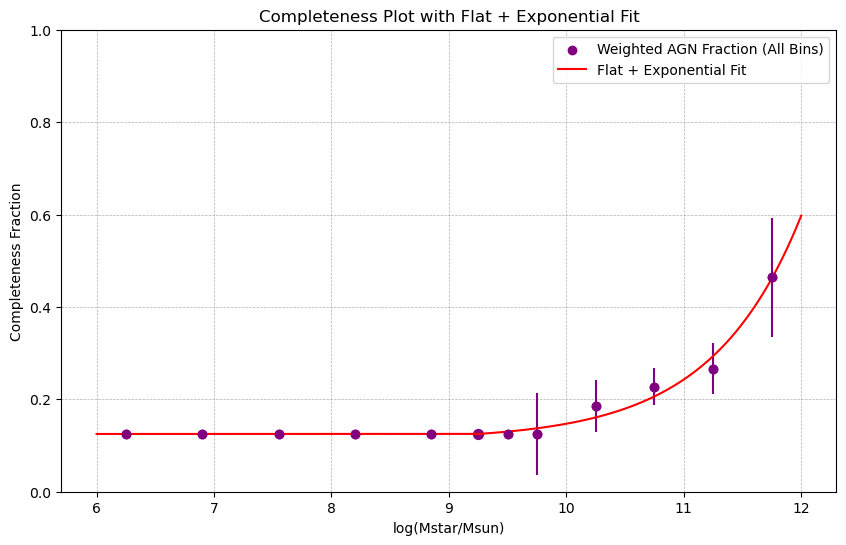

In [72]:
#linear and exponential fit
# Define the exponential fit function
# Define the constrained exponential fit function
def exponential_fit(x, b, c):
    # Solve for `a` to ensure continuity at log(M*) = 9.25
    a = (0.125 - c) / np.exp(b * 9.25)
    return a * np.exp(b * x) + c

# Parameters for binning and smoothing
binsize = 0.5  # Bin size
bins_list = []
weighted_avg_frac_list = []
error_list = []

# Flat region for log(Mstar) < 9.25 (constant value)
forced_bins = np.linspace(6, 9.25, int((9.25 - 6) / binsize)) + 0.25  # Bin centers
forced_fractions = [0.125] * len(forced_bins)  # Constant completeness
forced_errors = [0] * len(forced_bins)  # No error for the flat region

# Add forced bins and fractions for lower masses
bins_list.extend(forced_bins)
weighted_avg_frac_list.extend(forced_fractions)
error_list.extend(forced_errors)

# Add the forced point at log(Mstar) = 12 with completeness fraction 0.6
#forced_bins_high_mass = [12]
#forced_fractions_high_mass = [0.6]
#forced_errors_high_mass = [0]

#bins_list.extend(forced_bins_high_mass)
#weighted_avg_frac_list.extend(forced_fractions_high_mass)
#error_list.extend(forced_errors_high_mass)

# Loop for actual data-derived bins (log(Mstar) >= 9.25 and < 12)
i = 9.5  # Start after 9.25 to skip replacing its value with actual data
while i < 12:
    # Define conditions for sources in the current bin
    w_total = (np.log10(Mstar_xray) > i) & (np.log10(Mstar_xray) < i + binsize)
    w_reliable = w_total & (df100['matched_reliable'] == 1)
    w_mid_ir = w_total & (df100['matched_mid_ir'] == 1)
    w_xray = w_total & (df100['matched_xray'] == 1)
    
    w2 = w_reliable | w_mid_ir | w_xray
    icount_agn = np.sum(w2)
    count_total = np.sum(w_total)
    
    if count_total > 0:
        frac_agn = icount_agn / count_total
        weighted_avg_frac = frac_agn
        error = np.sqrt(icount_agn) / count_total  # Approximate error
    else:
        weighted_avg_frac = 0
        error = 0
    
    bin_center = i + 0.5 * binsize
    bins_list.append(bin_center)
    weighted_avg_frac_list.append(weighted_avg_frac)
    error_list.append(error)
    
    i += binsize

# Convert lists to arrays for fitting and plotting
bins_array = np.array(bins_list)
weighted_avg_frac_array = np.array(weighted_avg_frac_list)
error_array = np.array(error_list)

# Include the forced point in the fitting
bins_array_fitting = bins_array[bins_array > 9.25]  # Include log(Mstar) >= 9.25
weighted_avg_frac_array_fitting = weighted_avg_frac_array[bins_array > 9.25]

# Add the forced point (12, 0.6) to the fitting arrays
bins_array_fitting = np.append(bins_array_fitting, 12)
weighted_avg_frac_array_fitting = np.append(weighted_avg_frac_array_fitting, 0.6)

# Fit the exponential model
popt, pcov = curve_fit(
    exponential_fit, 
    bins_array_fitting, 
    weighted_avg_frac_array_fitting, 
    p0=[0.1, 0.05],  # Initial guesses for `b` and `c`
    maxfev=10000
)

# Generate the fit curve for the entire range
x_fit = np.linspace(6, 12, 500)
y_fit = np.piecewise(
    x_fit,
    [x_fit < 9.25, x_fit >= 9.25],
    [lambda x: 0.125,  # Flat line for log(Mstar) < 9.25
     lambda x: exponential_fit(x, *popt)]  # Exponential fit for log(Mstar) >= 9.25
)

# Plot data points and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(bins_array, weighted_avg_frac_array, color='purple', label='Weighted AGN Fraction (All Bins)')
plt.errorbar(bins_array, weighted_avg_frac_array, yerr=error_array, fmt='o', color='purple')
plt.plot(x_fit, y_fit, color='red', linestyle='-', label='Flat + Exponential Fit')

# Highlight the forced point at log(Mstar) = 12
#plt.scatter(forced_bins_high_mass, forced_fractions_high_mass, color='green', s=100, label='Forced Point (log(Mstar) = 12)')
plt.scatter([9.25], [0.125], color='purple', s=50)

# Customize the plot
plt.title('Completeness Plot with Flat + Exponential Fit')
plt.xlabel("log(Mstar/Msun)")
plt.ylabel("Completeness Fraction")
plt.legend()
plt.ylim(0, 1)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig("Completeness Plot with Flat + Exponential Fit.png", dpi=300, bbox_inches='tight')
plt.show()


In [74]:
#for corrected agn occupation fraction plot
Mstargal_1 = df1["Mstar_gal"]
Mstar_agn1 = df1["Mstar_agn"]
z1 = df1["redshift"]
reliable_agn_ecdfs = df1["flag_reliablesedagn"]
flagXray_agn_ecdfs = df1["flag_Xrayagn"]
flag_S05_ecdfs = df1["flag_IRagn_S05"]
flag_L07_ecdfs = df1["flag_IRagn_L07"]
flag_D12_ecdfs = df1["flag_IRagn_D12"]

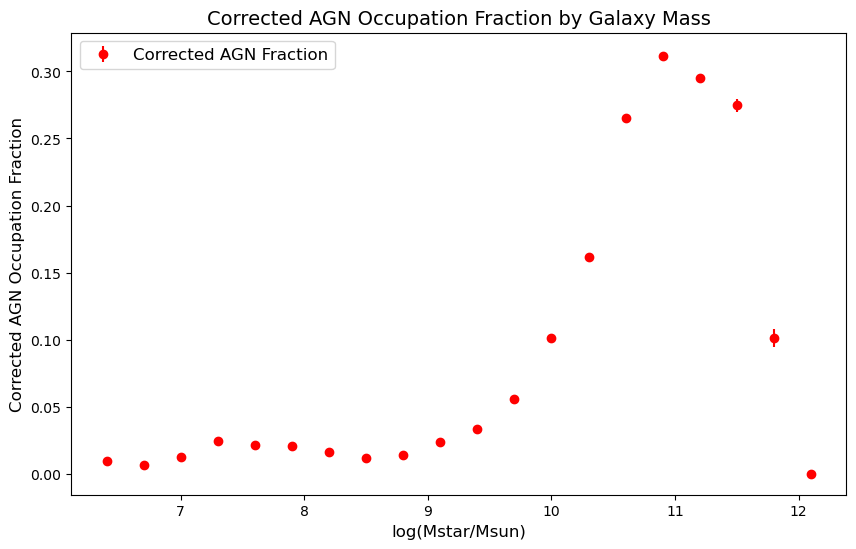

In [76]:
bins_list = []
corrected_frac_list = []
y_err_list = []

i = 6.25  # Starting log(Mstar) value for corrected AGN fraction bins
binsize = 0.3  # Bin size

# Use the exponential fit function from the completeness plot
def exponential_fit(x, b, c):
    a = (0.125 - c) / np.exp(b * 9.25)  # Ensure continuity at log(Mstar) = 9.25
    return a * np.exp(b * x) + c

# Parameters from your completeness plot (replace these with actual values)
popt = [.1, .05]  # Replace with actual b, c values

# Loop through the mass bins
while i < 12:
    # Condition for galaxies in the current bin
    w1 = (np.log10(Mstargal_1) > i) & (np.log10(Mstargal_1) < i + binsize) & (z1 < 1)
    
    # Condition for AGNs in the current bin
    w2 = (np.log10(Mstargal_1) > i) & (np.log10(Mstargal_1) < i + binsize) & (
        (reliable_agn_ecdfs == 1) | (flagXray_agn_ecdfs == 1) | 
        (flag_S05_ecdfs == 1) | (flag_L07_ecdfs == 1) | (flag_D12_ecdfs == 1)
    ) & (z1 < 1)
    
    # Count galaxies and AGNs in the bin
    galmass = Mstargal_1[w1]
    icount_gal = len(galmass)
    agn_masses = Mstargal_1[w2]
    icount_agn = len(agn_masses)
    
    # Calculate the raw occupation fraction
    if icount_gal > 0:
        frac = icount_agn / icount_gal
    else:
        frac = 0  # Avoid division by zero
    
    # Bin center for this iteration
    bins = i + (0.5 * binsize)
    bins_list.append(bins)
    
    # Evaluate the completeness correction factor at the bin center
    if bins < 9.25:
        correction_factor = 0.125  # Flat value for lower masses
    else:
        correction_factor = max(exponential_fit(bins, *popt), 0.1)  # Exponential fit for higher masses
    
    # Correct the raw fraction
    if correction_factor > 0:  # Avoid division by zero or negative correction factors
        corrected_frac = frac / correction_factor
    else:
        corrected_frac = frac  # Default to raw fraction if correction factor is invalid
    
    corrected_frac_list.append(corrected_frac)
    
    # Calculate error for the corrected fraction
    if icount_gal > 0:
        y_err = np.sqrt(((icount_agn / icount_gal) * (1 - (icount_agn / icount_gal))) / icount_gal)
    else:
        y_err = 0  # Default error if no galaxies are present
    y_err_list.append(y_err)
    
    # Move to the next bin
    i += binsize

# Convert lists to arrays for plotting
bins_array = np.array(bins_list)
corrected_frac_array = np.array(corrected_frac_list)
y_err_array = np.array(y_err_list)

# Plot the corrected fraction with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(bins_array, corrected_frac_array, yerr=y_err_array, fmt='o', color='red', label='Corrected AGN Fraction')

# Customize the plot
plt.xlabel("log(Mstar/Msun)", fontsize=12)
plt.ylabel("Corrected AGN Occupation Fraction", fontsize=12)
plt.title("Corrected AGN Occupation Fraction by Galaxy Mass", fontsize=14)
plt.legend(fontsize=12)
plt.show()


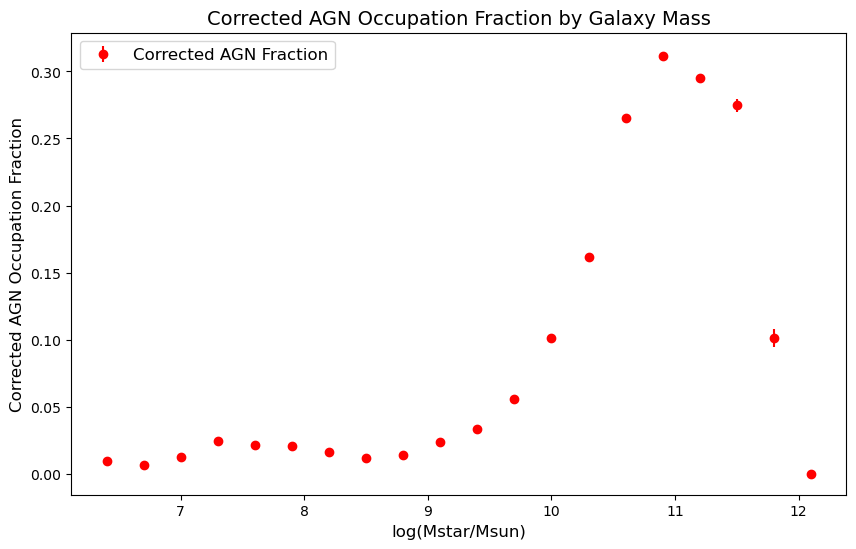

In [143]:
bins_list = []
corrected_frac_list = []
y_err_list = []

i = 6.25  # Starting log(Mstar) value for corrected AGN fraction bins
binsize = 0.3  # Bin size

# Use the exponential fit function from the completeness plot
def exponential_fit(x, b, c):
    a = (0.125 - c) / np.exp(b * 9.25)  # Ensure continuity at log(Mstar) = 9.25
    return a * np.exp(b * x) + c

# Parameters from your completeness plot (replace these with actual values)
popt = [.1, .05]  # Replace with actual b, c values

# Loop through the mass bins
while i < 12:
    # Condition for galaxies in the current bin
    w1 = (np.log10(Mstargal_1) > i) & (np.log10(Mstargal_1) < i + binsize) & (z1 < 1)
    
    # Condition for AGNs in the current bin
    w2 = (np.log10(Mstargal_1) > i) & (np.log10(Mstargal_1) < i + binsize) & (
        (reliable_agn_ecdfs == 1) | (flagXray_agn_ecdfs == 1) | 
        (flag_S05_ecdfs == 1) | (flag_L07_ecdfs == 1) | (flag_D12_ecdfs == 1)
    ) & (z1 < 1)
    
    # Count galaxies and AGNs in the bin
    galmass = Mstargal_1[w1]
    icount_gal = len(galmass)
    agn_masses = Mstargal_1[w2]
    icount_agn = len(agn_masses)
    
    # Calculate the raw occupation fraction
    if icount_gal > 0:
        frac = icount_agn / icount_gal
    else:
        frac = 0  # Avoid division by zero
    
    # Bin center for this iteration
    bins = i + (0.5 * binsize)
    bins_list.append(bins)
    
    # Evaluate the completeness correction factor at the bin center
    if bins < 9.25:
        correction_factor = 0.125  # Flat value for lower masses
    else:
        correction_factor = max(exponential_fit(bins, *popt), 0.1)  # Exponential fit for higher masses
    
    # Correct the raw fraction
    if correction_factor > 0:  # Avoid division by zero or negative correction factors
        corrected_frac = frac / correction_factor
    else:
        corrected_frac = frac  # Default to raw fraction if correction factor is invalid
    
    corrected_frac_list.append(corrected_frac)
    
    # Calculate error for the corrected fraction
    if icount_gal > 0:
        y_err = np.sqrt(((icount_agn / icount_gal) * (1 - (icount_agn / icount_gal))) / icount_gal)
    else:
        y_err = 0  # Default error if no galaxies are present
    y_err_list.append(y_err)
    
    # Move to the next bin
    i += binsize

# Convert lists to arrays for plotting
bins_array = np.array(bins_list)
corrected_frac_array = np.array(corrected_frac_list)
y_err_array = np.array(y_err_list)

# Plot the corrected fraction with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(bins_array, corrected_frac_array, yerr=y_err_array, fmt='o', color='red', label='Corrected AGN Fraction')

# Customize the plot
plt.xlabel("log(Mstar/Msun)", fontsize=12)
plt.ylabel("Corrected AGN Occupation Fraction", fontsize=12)
plt.title("Corrected AGN Occupation Fraction by Galaxy Mass", fontsize=14)
plt.legend(fontsize=12)
plt.savefig("Corrected AGN Occupation Fraction by Galaxy Mass.png", dpi=300, bbox_inches='tight')
plt.show()


In [139]:
import os
print(os.getcwd())


C:\Users\reina


Bin Center: 6.4
  Number of Galaxies: 4079
  Number of AGNs: 5

Correction Factor for bin 6.4: -0.015624129684817736
Invalid correction factor for bin 6.4, using raw fraction.
Bin Center: 6.7
  Number of Galaxies: 4798
  Number of AGNs: 4

Correction Factor for bin 6.7: -0.013044314288703892
Invalid correction factor for bin 6.7, using raw fraction.
Bin Center: 7.0
  Number of Galaxies: 6243
  Number of AGNs: 10

Correction Factor for bin 7.0: -0.009854872656704709
Invalid correction factor for bin 7.0, using raw fraction.
Bin Center: 7.3
  Number of Galaxies: 9128
  Number of AGNs: 28

Correction Factor for bin 7.3: -0.005911746361988716
Invalid correction factor for bin 7.3, using raw fraction.
Bin Center: 7.6
  Number of Galaxies: 12228
  Number of AGNs: 33

Correction Factor for bin 7.6: -0.0010368350859560962
Invalid correction factor for bin 7.6, using raw fraction.
Bin Center: 7.8999999999999995
  Number of Galaxies: 17188
  Number of AGNs: 45

Correction Factor for bin 7.899999

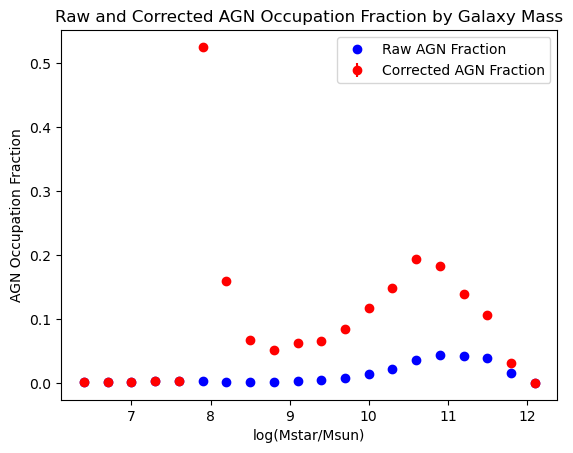

In [135]:
#now plot against the raw agn occupation fraction to compare results
bins_list = []
raw_frac_list = []  # List to store raw AGN fractions
corrected_frac_list = []
y_err_list = []

i = 6.25
binsize = 0.3

# Loop through the mass bins
while i < 12:
    # Condition for galaxies in the current bin
    w1 = (np.log10(Mstargal_1) > i) & (np.log10(Mstargal_1) < i + binsize) & (z1 < 1)
    
    # Condition for AGNs in the current bin
    w2 = (np.log10(Mstargal_1) > i) & (np.log10(Mstargal_1) < i + binsize) & (
        (reliable_agn_ecdfs == 1) | (flagXray_agn_ecdfs == 1) | 
        (flag_S05_ecdfs == 1) | (flag_L07_ecdfs == 1) | (flag_D12_ecdfs == 1)
    ) & (z1 < 1)
    
    # Count galaxies and AGNs in the bin
    galmass = Mstargal_1[w1]
    icount_gal = len(galmass)
    agn_masses = Mstargal_1[w2]
    icount_agn = len(agn_masses)
    
    print(f"Bin Center: {i + (0.5 * binsize)}")
    print(f"  Number of Galaxies: {icount_gal}")
    print(f"  Number of AGNs: {icount_agn}\n")
    
    # Calculate the raw occupation fraction
    if icount_gal > 0:
        frac = icount_agn / icount_gal
    else:
        frac = 0  # Avoid division by zero
    raw_frac_list.append(frac)  # Store the raw fraction

    # Bin center for this iteration
    bins = i + (0.5 * binsize)
    bins_list.append(bins)
    
    # Evaluate the exponential completeness fit at the bin center
    correction_factor = exponential_fit(bins, *popt)
    
    # Print out the correction factor for debugging
    print(f"Correction Factor for bin {bins}: {correction_factor}")
    
    # Correct the raw fraction (ensure the correction factor is valid and positive)
    if correction_factor > 0:  # Avoid division by zero or negative correction factors
        corrected_frac = frac / correction_factor
    else:
        print(f"Invalid correction factor for bin {bins}, using raw fraction.")
        corrected_frac = frac  # Default to raw fraction if correction factor is invalid
    
    corrected_frac_list.append(corrected_frac)
    
    # Calculate error for the corrected fraction
    if icount_gal > 0:
        y_err = np.sqrt(((icount_agn / icount_gal) * (1 - (icount_agn / icount_gal))) / icount_gal)
    else:
        y_err = 0  # Default error if no galaxies are present
    y_err_list.append(y_err)
    
    # Move to the next bin
    i += binsize

# Convert lists to arrays for plotting
bins_array = np.array(bins_list)
raw_frac_array = np.array(raw_frac_list)  # Array of raw AGN fractions
corrected_frac_array = np.array(corrected_frac_list)
y_err_array = np.array(y_err_list)

# Plot the raw fraction (without correction)
plt.errorbar(bins_array, raw_frac_array, fmt='o', color='blue', label='Raw AGN Fraction')

# Plot the corrected fraction with error bars
plt.errorbar(bins_array, corrected_frac_array, yerr=y_err_array, fmt='o', color='red', label='Corrected AGN Fraction')

# Customize the plot
plt.xlabel("log(Mstar/Msun)")
plt.ylabel("AGN Occupation Fraction")
plt.title("Raw and Corrected AGN Occupation Fraction by Galaxy Mass")
plt.legend()
plt.show()

In [75]:
#now what happens if we have a redshift limit for the completeness plot of z<1?
#but first i gotta include the redshift as part of Luo df100 table since it's not given
coords_df100 = SkyCoord(ra=df100['RA'].values * u.deg, dec=df100['DEC'].values * u.deg)
coords_df_z = SkyCoord(ra=df1['RA'].values * u.deg, dec=df1['DEC'].values * u.deg)

# Perform the matching within a specified tolerance
idx_z, d2d_z, d3d_z = coords_df100.match_to_catalog_sky(coords_df_z)
tolerance = 1.0 * u.arcsec
matches_within_tolerance = d2d_z < tolerance

# Ensure df1 is properly indexed
df1.reset_index(drop=True, inplace=True)

# Assign redshifts safely
df100['redshift'] = np.nan  # Initialize all entries as NaN
for i, match in enumerate(matches_within_tolerance):
    if match:  # Only assign redshift where there is a match within tolerance
        df100.at[i, 'redshift'] = df1.iloc[idx_z[i]]['redshift']  # Use .at for scalar setting

# Confirm the number of successfully matched and assigned redshift entries
print(f"Number of mid-IR sources successfully matched and assigned redshifts: {df100['redshift'].notna().sum()}")

Number of mid-IR sources successfully matched and assigned redshifts: 262


Bin: 9.25, Total X-ray Sources: 1
AGN fraction: 0.0
Bin: 9.75, Total X-ray Sources: 6
AGN fraction: 0.3333333333333333
Bin: 10.25, Total X-ray Sources: 27
AGN fraction: 0.2222222222222222
Bin: 10.75, Total X-ray Sources: 22
AGN fraction: 0.3181818181818182
Bin: 11.25, Total X-ray Sources: 9
AGN fraction: 0.6666666666666666
Bin: 11.75, Total X-ray Sources: 2
AGN fraction: 0.5


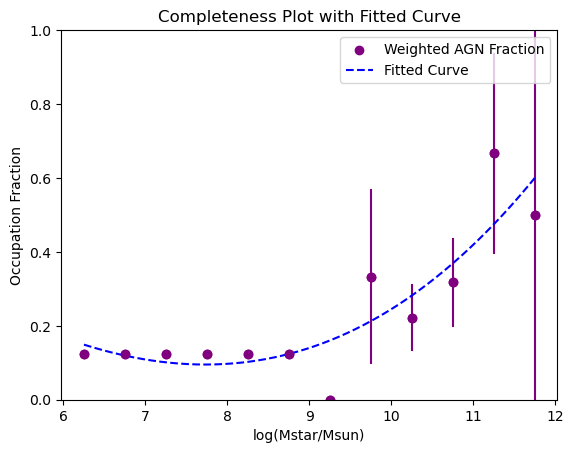

In [127]:
zc = df100['redshift']
i = 9  # Starting log(Mstar) value for data-derived bins
binsize = 0.5  # Size of each bin
bins_list = []
weighted_avg_frac_list = []
error_list = []

# Manually add forced fractions for log(Mstar) between 6 and 9
forced_bins = [6.25, 6.75, 7.25, 7.75, 8.25, 8.75]  # Bin centers in the range 6 to 9
forced_fractions = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125]  # Forced low fractions
forced_errors = [0] * len(forced_bins)  # No errors or very small errors for forced values

# Add the forced fractions to the lists for plotting
bins_list.extend(forced_bins)
weighted_avg_frac_list.extend(forced_fractions)
error_list.extend(forced_errors)

# Now proceed with your normal loop for i >= 9 (for actual data)
while i < 12:
    # Define conditions for sources in the current bin
    w_total = (np.log10(Mstar_xray) > i) & (np.log10(Mstar_xray) < i + binsize) & (zc < 1) 
    
    # Condition for reliable SED AGN, mid-IR, and X-ray sources in the current bin
    w_reliable = w_total & (df100['matched_reliable'] == 1)
    w_mid_ir = w_total & (df100['matched_mid_ir'] == 1)
    w_xray = w_total & (df100['matched_xray'] == 1)
    
    w2 = (w_reliable | w_mid_ir | w_xray) & (zc < 1) 
    icount_agn = np.sum(w2)
    
    # Count the number of sources in the bin
    count_total = np.sum(w_total)
    
    # Calculate completeness fractions for each AGN type
    if count_total > 0:
        frac_agn = icount_agn / count_total
        
        # Store the weighted average fraction
        weighted_avg_frac = frac_agn 
        
        # Calculate error as standard deviation (this is an approximation)
        error = np.sqrt(icount_agn) / count_total
    

    # Store results for plotting
    bin_center = i + 0.5 * binsize
    bins_list.append(bin_center)
    weighted_avg_frac_list.append(weighted_avg_frac)
    error_list.append(error)
    
    print(f"Bin: {bin_center}, Total X-ray Sources: {count_total}")
    print(f"AGN fraction: {weighted_avg_frac}")
    
    # Increment to the next bin
    i += binsize

# Convert lists to arrays for plotting
bins_array = np.array(bins_list)
weighted_avg_frac_array = np.array(weighted_avg_frac_list)
error_array = np.array(error_list)

# Create the scatter plot for the weighted averaged fractions
plt.scatter(bins_array, weighted_avg_frac_array, color='purple', label='Weighted AGN Fraction')
plt.errorbar(bins_array, weighted_avg_frac_array, yerr=error_array, fmt='o', color='purple')

# Fit a parabola (degree 2 polynomial) to the weighted averaged fractions
fit_params = np.polyfit(bins_array, weighted_avg_frac_array, 3)
x_fit = np.linspace(min(bins_array), max(bins_array), 500)
y_fit = np.polyval(fit_params, x_fit)

# Plot the fitted curve
plt.plot(x_fit, y_fit, color='blue', linestyle='--', label='Fitted Curve')

# Customize the plot
plt.title('Completeness Plot with Fitted Curve')
plt.xlabel("log(Mstar/Msun)")
plt.ylabel("Occupation Fraction")
plt.legend()
plt.ylim(0, 1)  # Set y-axis to 0-1 range
plt.show()

Bin Center: 6.4
  Number of Galaxies: 4079
  Number of AGNs: 5

Correction Factor for bin 6.4: 0.13902453831241723
Bin Center: 6.7
  Number of Galaxies: 4798
  Number of AGNs: 4

Correction Factor for bin 6.7: 0.12188882413882429
Bin Center: 7.0
  Number of Galaxies: 6243
  Number of AGNs: 10

Correction Factor for bin 7.0: 0.1088173891204196
Bin Center: 7.3
  Number of Galaxies: 9128
  Number of AGNs: 28

Correction Factor for bin 7.3: 0.10000815654603534
Bin Center: 7.6
  Number of Galaxies: 12228
  Number of AGNs: 33

Correction Factor for bin 7.6: 0.09565904970450423
Bin Center: 7.8999999999999995
  Number of Galaxies: 17188
  Number of AGNs: 45

Correction Factor for bin 7.8999999999999995: 0.09596799188465832
Bin Center: 8.2
  Number of Galaxies: 26780
  Number of AGNs: 53

Correction Factor for bin 8.2: 0.10113290637533034
Bin Center: 8.5
  Number of Galaxies: 38256
  Number of AGNs: 56

Correction Factor for bin 8.5: 0.11135171646535258
Bin Center: 8.8
  Number of Galaxies: 451

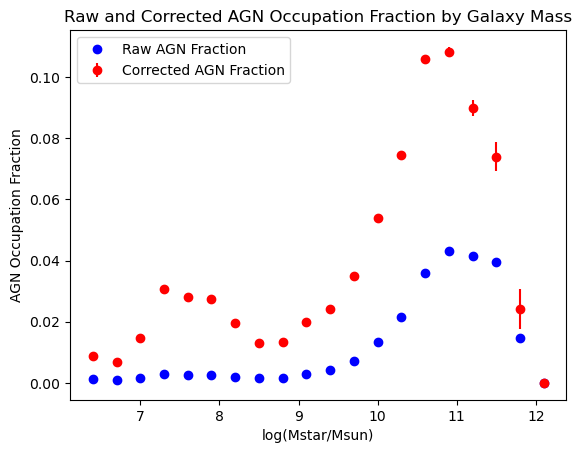

In [129]:
bins_list = []
raw_frac_list = []  # List to store raw AGN fractions
corrected_frac_list = []
y_err_list = []

i = 6.25
binsize = 0.3

# Loop through the mass bins
while i < 12:
    w1 = (np.log10(Mstargal_1) > i) & (np.log10(Mstargal_1) < i + binsize) & (z1 < 1)
    w2 = (np.log10(Mstargal_1) > i) & (np.log10(Mstargal_1) < i + binsize) & (
        (reliable_agn_ecdfs == 1) | (flagXray_agn_ecdfs == 1) | 
        (flag_S05_ecdfs == 1) | (flag_L07_ecdfs == 1) | (flag_D12_ecdfs == 1)
    ) & (z1 < 1)
    
    galmass = Mstargal_1[w1]
    icount_gal = len(galmass)
    
    # AGN counts in bin
    agn_masses = Mstargal_1[w2]
    icount_agn = len(agn_masses)
    print(f"Bin Center: {i + (0.5 * binsize)}")
    print(f"  Number of Galaxies: {icount_gal}")
    print(f"  Number of AGNs: {icount_agn}\n")
    
    # Calculate the raw occupation fraction
    if icount_gal > 0:
        frac = icount_agn / icount_gal
    # Avoid division by zero
    raw_frac_list.append(frac)  # Store the raw fraction

    # Bin center for this iteration
    bins = i + (0.5 * binsize)
    bins_list.append(bins)
    
    # Evaluate the fitted curve at the bin center to get the correction factor
    correction_factor = np.polyval(fit_params, bins)
    
    # Print out the correction factor for debugging
    print(f"Correction Factor for bin {bins}: {correction_factor}")
    
    # Correct the raw fraction (ensure the correction factor is valid and positive)
    if correction_factor > 0:  # Avoid division by zero or negative correction factors
        corrected_frac = frac / correction_factor
    else:
        print(f"Invalid correction factor for bin {bins}, using raw fraction.")
        corrected_frac = frac  # Default to raw fraction if correction factor is invalid
    
    corrected_frac_list.append(corrected_frac)
    
    # Calculate error for the corrected fraction
    if icount_gal > 0:
        y_err = np.sqrt(((icount_agn / icount_gal) * (1 - (icount_agn / icount_gal))) / icount_gal)
      # Default error if no galaxies are present
    y_err_list.append(y_err)
    
    # Move to the next bin
    i += binsize

# Convert lists to arrays for plotting
bins_array = np.array(bins_list)
raw_frac_array = np.array(raw_frac_list)  # Array of raw AGN fractions
corrected_frac_array = np.array(corrected_frac_list)
y_err_array = np.array(y_err_list)

# Plot the raw fraction (without correction)
plt.errorbar(bins_array, raw_frac_array, fmt='o', color='blue', label='Raw AGN Fraction')

# Plot the corrected fraction with error bars
plt.errorbar(bins_array, corrected_frac_array, yerr=y_err_array, fmt='o', color='red', label='Corrected AGN Fraction')

# Customize the plot
plt.xlabel("log(Mstar/Msun)")
plt.ylabel("AGN Occupation Fraction")
plt.title("Raw and Corrected AGN Occupation Fraction by Galaxy Mass")
plt.legend()
plt.show()

Bin: 9.25, Total X-ray Sources: 0
AGN fraction: 0.5
Bin: 9.75, Total X-ray Sources: 2
AGN fraction: 0.0
Bin: 10.25, Total X-ray Sources: 16
AGN fraction: 0.25
Bin: 10.75, Total X-ray Sources: 79
AGN fraction: 0.26582278481012656
Bin: 11.25, Total X-ray Sources: 54
AGN fraction: 0.25925925925925924
Bin: 11.75, Total X-ray Sources: 17
AGN fraction: 0.5294117647058824


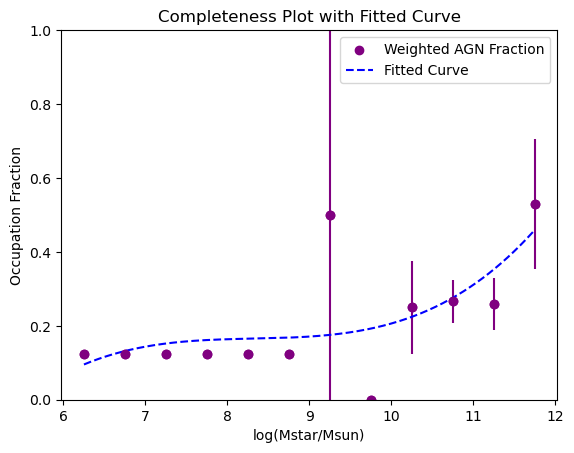

In [131]:
#now with redshift limit between 1  and 3
zc = df100['redshift']
i = 9  # Starting log(Mstar) value for data-derived bins
binsize = 0.5  # Size of each bin
bins_list = []
weighted_avg_frac_list = []
error_list = []

# Manually add forced fractions for log(Mstar) between 6 and 9
forced_bins = [6.25, 6.75, 7.25, 7.75, 8.25, 8.75]  # Bin centers in the range 6 to 9
forced_fractions = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125]  # Forced low fractions
forced_errors = [0] * len(forced_bins)  # No errors or very small errors for forced values

# Add the forced fractions to the lists for plotting
bins_list.extend(forced_bins)
weighted_avg_frac_list.extend(forced_fractions)
error_list.extend(forced_errors)

# Now proceed with your normal loop for i >= 9 (for actual data)
while i < 12:
    # Define conditions for sources in the current bin
    w_total = (np.log10(Mstar_xray) > i) & (np.log10(Mstar_xray) < i + binsize) & (zc > 1) & (zc < 3)
    
    # Condition for reliable SED AGN, mid-IR, and X-ray sources in the current bin
    w_reliable = w_total & (df100['matched_reliable'] == 1)
    w_mid_ir = w_total & (df100['matched_mid_ir'] == 1)
    w_xray = w_total & (df100['matched_xray'] == 1)
    
    w2 = (w_reliable | w_mid_ir | w_xray) & (zc > 1) & (zc < 3)
    icount_agn = np.sum(w2)
    
    # Count the number of sources in the bin
    count_total = np.sum(w_total)
    
    # Calculate completeness fractions for each AGN type
    if count_total > 0:
        frac_agn = icount_agn / count_total
        
        # Store the weighted average fraction
        weighted_avg_frac = frac_agn 
        
        # Calculate error as standard deviation (this is an approximation)
        error = np.sqrt(icount_agn) / count_total
    

    # Store results for plotting
    bin_center = i + 0.5 * binsize
    bins_list.append(bin_center)
    weighted_avg_frac_list.append(weighted_avg_frac)
    error_list.append(error)
    
    print(f"Bin: {bin_center}, Total X-ray Sources: {count_total}")
    print(f"AGN fraction: {weighted_avg_frac}")
    
    # Increment to the next bin
    i += binsize

# Convert lists to arrays for plotting
bins_array = np.array(bins_list)
weighted_avg_frac_array = np.array(weighted_avg_frac_list)
error_array = np.array(error_list)

# Create the scatter plot for the weighted averaged fractions
plt.scatter(bins_array, weighted_avg_frac_array, color='purple', label='Weighted AGN Fraction')
plt.errorbar(bins_array, weighted_avg_frac_array, yerr=error_array, fmt='o', color='purple')

# Fit a parabola (degree 2 polynomial) to the weighted averaged fractions
fit_params = np.polyfit(bins_array, weighted_avg_frac_array, 3)
x_fit = np.linspace(min(bins_array), max(bins_array), 500)
y_fit = np.polyval(fit_params, x_fit)

# Plot the fitted curve
plt.plot(x_fit, y_fit, color='blue', linestyle='--', label='Fitted Curve')

# Customize the plot
plt.title('Completeness Plot with Fitted Curve')
plt.xlabel("log(Mstar/Msun)")
plt.ylabel("Occupation Fraction")
plt.legend()
plt.ylim(0, 1)  # Set y-axis to 0-1 range
plt.show()

Bin Center: 6.4
  Number of Galaxies: 0
  Number of AGNs: 0

Correction Factor for bin 6.4: 0.10827446600469104
Bin Center: 6.7
  Number of Galaxies: 0
  Number of AGNs: 0

Correction Factor for bin 6.7: 0.12892178395705178
Bin Center: 7.0
  Number of Galaxies: 0
  Number of AGNs: 0

Correction Factor for bin 7.0: 0.14360139566843655
Bin Center: 7.3
  Number of Galaxies: 0
  Number of AGNs: 0

Correction Factor for bin 7.3: 0.15342276105098573
Bin Center: 7.6
  Number of Galaxies: 7
  Number of AGNs: 0

Correction Factor for bin 7.6: 0.15949534001684018
Bin Center: 7.8999999999999995
  Number of Galaxies: 264
  Number of AGNs: 0

Correction Factor for bin 7.8999999999999995: 0.1629285924781403
Bin Center: 8.2
  Number of Galaxies: 2386
  Number of AGNs: 0

Correction Factor for bin 8.2: 0.16483197834702645
Bin Center: 8.5
  Number of Galaxies: 10472
  Number of AGNs: 0

Correction Factor for bin 8.5: 0.16631495753563952
Bin Center: 8.8
  Number of Galaxies: 28239
  Number of AGNs: 12



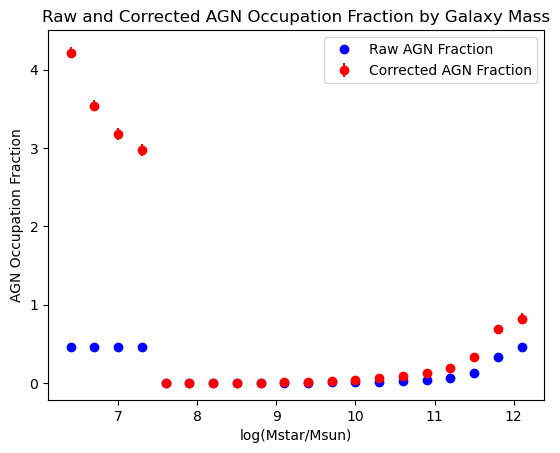

(6.0, 12.0, 0.0, 0.1)

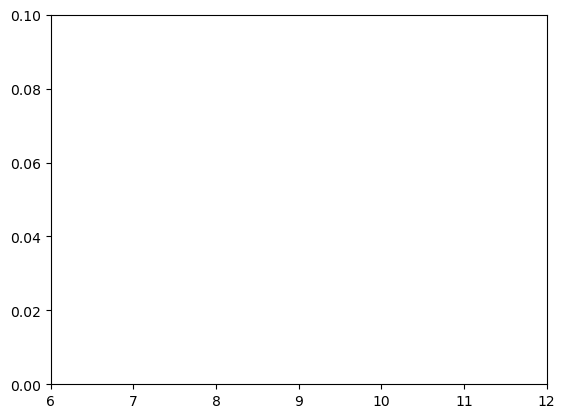

In [135]:
bins_list = []
raw_frac_list = []  # List to store raw AGN fractions
corrected_frac_list = []
y_err_list = []

i = 6.25
binsize = 0.3

# Loop through the mass bins
while i < 12:
    w1 = (np.log10(Mstargal_1) > i) & (np.log10(Mstargal_1) < i + binsize) & (z1 > 1) & (z1 < 3)
    w2 = (np.log10(Mstargal_1) > i) & (np.log10(Mstargal_1) < i + binsize) & (
        (reliable_agn_ecdfs == 1) | (flagXray_agn_ecdfs == 1) | 
        (flag_S05_ecdfs == 1) | (flag_L07_ecdfs == 1) | (flag_D12_ecdfs == 1)
    ) & (z1 > 1) & (z1 < 3)
    
    galmass = Mstargal_1[w1]
    icount_gal = len(galmass)
    
    # AGN counts in bin
    agn_masses = Mstargal_1[w2]
    icount_agn = len(agn_masses)
    print(f"Bin Center: {i + (0.5 * binsize)}")
    print(f"  Number of Galaxies: {icount_gal}")
    print(f"  Number of AGNs: {icount_agn}\n")
    
    # Calculate the raw occupation fraction
    if icount_gal > 0:
        frac = icount_agn / icount_gal
    # Avoid division by zero
    raw_frac_list.append(frac)  # Store the raw fraction

    # Bin center for this iteration
    bins = i + (0.5 * binsize)
    bins_list.append(bins)
    
    # Evaluate the fitted curve at the bin center to get the correction factor
    correction_factor = np.polyval(fit_params, bins)
    
    # Print out the correction factor for debugging
    print(f"Correction Factor for bin {bins}: {correction_factor}")
    
    # Correct the raw fraction (ensure the correction factor is valid and positive)
    if correction_factor > 0:  # Avoid division by zero or negative correction factors
        corrected_frac = frac / correction_factor
    else:
        print(f"Invalid correction factor for bin {bins}, using raw fraction.")
        corrected_frac = frac  # Default to raw fraction if correction factor is invalid
    
    corrected_frac_list.append(corrected_frac)
    
    # Calculate error for the corrected fraction
    if icount_gal > 0:
        y_err = np.sqrt(((icount_agn / icount_gal) * (1 - (icount_agn / icount_gal))) / icount_gal)
      # Default error if no galaxies are present
    y_err_list.append(y_err)
    
    # Move to the next bin
    i += binsize

# Convert lists to arrays for plotting
bins_array = np.array(bins_list)
raw_frac_array = np.array(raw_frac_list)  # Array of raw AGN fractions
corrected_frac_array = np.array(corrected_frac_list)
y_err_array = np.array(y_err_list)

# Plot the raw fraction (without correction)
plt.errorbar(bins_array, raw_frac_array, fmt='o', color='blue', label='Raw AGN Fraction')

# Plot the corrected fraction with error bars
plt.errorbar(bins_array, corrected_frac_array, yerr=y_err_array, fmt='o', color='red', label='Corrected AGN Fraction')

# Customize the plot
plt.xlabel("log(Mstar/Msun)")
plt.ylabel("AGN Occupation Fraction")
plt.title("Raw and Corrected AGN Occupation Fraction by Galaxy Mass")
plt.legend()
plt.show()
plt.axis([6,12,0,.1])

In [78]:
#combine corrected agn occupation fraction with figure 4 which is all of the drilling fields
dat = Table.read('wcdfs.v1.fits', format='fits')
df1 = dat.to_pandas()
dat = Table.read('xmmlss.v1.fits', format='fits')
df2 = dat.to_pandas()
dat = Table.read('es1.v1.fits', format='fits')
df3 = dat.to_pandas()
#label data
#ecdfs
Mstar_gal1 = df1["Mstar_gal"]
Mstar_agn1 = df1["Mstar_agn"]
z1 = df1["redshift"]
AGN_frac1 = df1["fracagn"]
ΔBIC1_agn1 = df1["detBIC1_agn"]
reliable_agn1 = df1["flag_reliablesedagn"]
ΔBIC2_agn1 = df1["detBIC2_agn"]
star1 = df1["flag_star"]
#label data to create limits
flagXray_agn1 = df1["flag_Xrayagn"]
flag_S051 = df1["flag_IRagn_S05"]
flag_L071 = df1["flag_IRagn_L07"]
flag_D121 = df1["flag_IRagn_D12"]

#xmm-lss
Mstar_gal2 = df2["Mstar_gal"]
Mstar_agn2 = df2["Mstar_agn"]
z2 = df2["redshift"]
AGN_frac2 = df2["fracagn"]
ΔBIC1_agn2 = df2["detBIC1_agn"]
reliable_agn2 = df2["flag_reliablesedagn"]
ΔBIC2_agn2 = df2["detBIC2_agn"]
star2 = df2["flag_star"]
#label data to create limits
flagXray_agn2 = df2["flag_Xrayagn"]
flag_S052 = df2["flag_IRagn_S05"]
flag_L072 = df2["flag_IRagn_L07"]
flag_D122 = df2["flag_IRagn_D12"]

#es1
Mstar_gal3 = df3["Mstar_gal"]
Mstar_agn3 = df3["Mstar_agn"]
z3 = df3["redshift"]
AGN_frac3 = df3["fracagn"]
ΔBIC1_agn3 = df3["detBIC1_agn"]
reliable_agn3 = df3["flag_reliablesedagn"]
ΔBIC2_agn3 = df3["detBIC2_agn"]
star3 = df3["flag_star"]
#label data to create limits
flagXray_agn3 = df3["flag_Xrayagn"]
flag_S053 = df3["flag_IRagn_S05"]
flag_L073 = df3["flag_IRagn_L07"]
flag_D123 = df3["flag_IRagn_D12"]


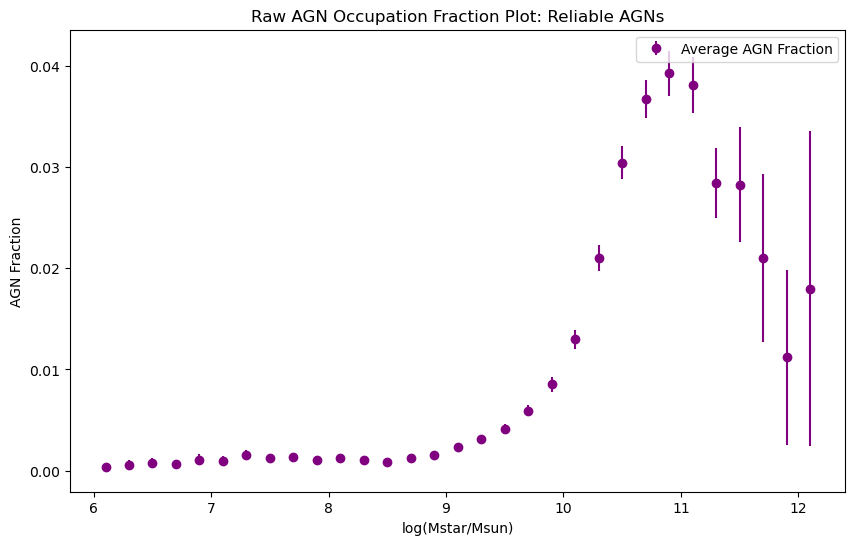

In [79]:
i = 6
binsize = 0.2
bins_centers = []
fractions = []
errors = []
while i < 12:
    w1 = (np.log10(Mstar_gal1) > i) & (np.log10(Mstar_gal1) < i + binsize) & (z1 < 1)
    w2 = (np.log10(Mstar_agn1) > i) & (np.log10(Mstar_agn1) < i + binsize) & ((reliable_agn1 == 1) |(flagXray_agn1 == 1) | (flag_S051 == 1)
                                                                                                  |(flag_L071 == 1) | (flag_D121 == 1))  & (z1 < 1)
    w3 = (np.log10(Mstar_gal2) > i) & (np.log10(Mstar_gal2) < i + binsize) & (z2 < 1)
    w4 = (np.log10(Mstar_agn2) > i) & (np.log10(Mstar_agn2) < i + binsize) & ((reliable_agn2 == 1) |(flagXray_agn2 == 1) | (flag_S052 == 1)
                                                                                                  |(flag_L072 == 1) | (flag_D122 == 1))  & (z2 < 1)
    w5 = (np.log10(Mstar_gal3) > i) & (np.log10(Mstar_gal3) < i + binsize) & (z3 < 1)
    w6 = (np.log10(Mstar_agn3) > i) & (np.log10(Mstar_agn3) < i + binsize) & ((reliable_agn3 == 1) |(flagXray_agn3 == 1) | (flag_S053 == 1)
                                                                                                  |(flag_L073 == 1) | (flag_D123 == 1))  & (z3 < 1)
    galmass = Mstar_gal1[w1]
    galmass1 = Mstar_gal1[w3]
    galmass2 = Mstar_gal1[w5]
    
    icount_gal = len(galmass)
    icount_gal1 = len(galmass1)
    icount_gal2 = len(galmass2)
    agn_masses = Mstar_agn1[w2]
    agn_masses1 = Mstar_agn1[w4]
    agn_masses2 = Mstar_agn1[w6]
    
    icount_agn = len(agn_masses)
    icount_agn1 = len(agn_masses1)
    icount_agn2 = len(agn_masses2)
    
    frac = icount_agn / icount_gal
    frac1 = icount_agn1 / icount_gal1
    frac2 = icount_agn2 / icount_gal2

    
    avg_frac = np.mean([frac, frac1, frac2])
    avg_error = np.sqrt(np.sum([frac*(1-frac)/icount_gal, frac1*(1-frac1)/icount_gal1, frac2*(1-frac2)/icount_gal2]) / 3)
    
    bins_centers.append(i + 0.5 * binsize)
    fractions.append(avg_frac)
    errors.append(avg_error)
    
    i += binsize
plt.figure(figsize=(10, 6))
plt.errorbar(bins_centers, fractions, yerr=errors, fmt='o', color='purple', label='Average AGN Fraction')
plt.xlabel('log(Mstar/Msun)')
plt.ylabel('AGN Fraction')
plt.title('Raw AGN Occupation Fraction Plot: Reliable AGNs')
#plt.xscale('log')
plt.grid(True, which='both', linestyle='', linewidth=0.5)
plt.legend()
plt.show()

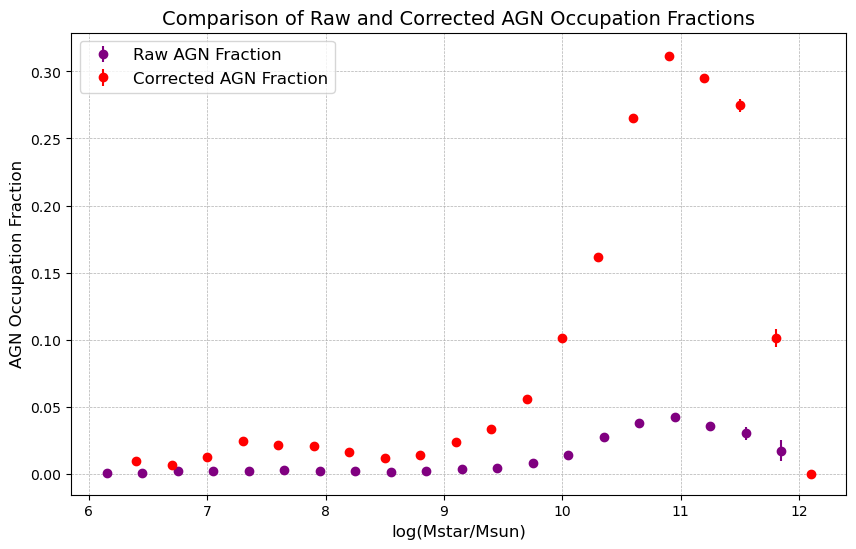

In [80]:
# --- Corrected AGN Fraction Code ---
bins_list = []
corrected_frac_list = []
y_err_list = []

i = 6.25  # Starting log(Mstar) value for corrected AGN fraction bins
binsize = 0.3  # Bin size

# Use the exponential fit function from the completeness plot
def exponential_fit(x, b, c):
    a = (0.125 - c) / np.exp(b * 9.25)  # Ensure continuity at log(Mstar) = 9.25
    return a * np.exp(b * x) + c

# Parameters from your completeness plot (replace these with actual values)
popt = [0.1, 0.05]  # Replace with actual b, c values

# Loop through the mass bins
while i < 12:
    # Condition for galaxies in the current bin
    w1 = (np.log10(Mstar_gal1) > i) & (np.log10(Mstar_gal1) < i + binsize) & (z1 < 1)
    w2 = (np.log10(Mstar_agn1) > i) & (np.log10(Mstar_agn1) < i + binsize) & (
        (reliable_agn1 == 1) | (flagXray_agn1 == 1) | (flag_S051 == 1) |
        (flag_L071 == 1) | (flag_D121 == 1)
    ) & (z1 < 1)
    
    galmass = Mstar_gal1[w1]
    icount_gal = len(galmass)
    agn_masses = Mstar_agn1[w2]
    icount_agn = len(agn_masses)
    frac = icount_agn / icount_gal if icount_gal > 0 else 0
    avg_error = np.sqrt(frac * (1 - frac) / icount_gal) if icount_gal > 0 else 0
    
    bins_centers.append(i + 0.5 * binsize)
    fractions.append(frac)
    errors.append(avg_error)
    
    i += binsize

# Convert raw AGN fraction data to arrays
raw_bins_array = np.array(bins_centers)
raw_fractions_array = np.array(fractions)
raw_errors_array = np.array(errors)
    # Calculate the raw occupation fraction
    if icount_gal > 0:
        frac = icount_agn / icount_gal
    else:
        frac = 0  # Avoid division by zero
    
    # Bin center for this iteration
    bins = i + (0.5 * binsize)
    bins_list.append(bins)
    
    # Evaluate the completeness correction factor at the bin center
    if bins < 9.25:
        correction_factor = 0.125  # Flat value for lower masses
    else:
        correction_factor = max(exponential_fit(bins, *popt), 0.1)  # Exponential fit for higher masses
    
    # Correct the raw fraction
    if correction_factor > 0:  # Avoid division by zero or negative correction factors
        corrected_frac = frac / correction_factor
    else:
        corrected_frac = frac  # Default to raw fraction if correction factor is invalid
    
    corrected_frac_list.append(corrected_frac)
    
    # Calculate error for the corrected fraction
    if icount_gal > 0:
        y_err = np.sqrt(((icount_agn / icount_gal) * (1 - (icount_agn / icount_gal))) / icount_gal)
    else:
        y_err = 0  # Default error if no galaxies are present
    y_err_list.append(y_err)
    
    # Move to the next bin
    i += binsize

# Convert lists to arrays for plotting
corrected_bins_array = np.array(bins_list)
corrected_frac_array = np.array(corrected_frac_list)
corrected_y_err_array = np.array(y_err_list)

# --- Raw AGN Fraction Code ---
i = 6
binsize = 0.3
bins_centers = []
fractions = []
errors = []

while i < 12:
    w1 = (np.log10(Mstar_gal1) > i) & (np.log10(Mstar_gal1) < i + binsize) & (z1 < 1)
    w2 = (np.log10(Mstar_agn1) > i) & (np.log10(Mstar_agn1) < i + binsize) & (
        (reliable_agn1 == 1) | (flagXray_agn1 == 1) | (flag_S051 == 1) |
        (flag_L071 == 1) | (flag_D121 == 1)
    ) & (z1 < 1)
    
    galmass = Mstar_gal1[w1]
    icount_gal = len(galmass)
    agn_masses = Mstar_agn1[w2]
    icount_agn = len(agn_masses)
    
    frac = icount_agn / icount_gal if icount_gal > 0 else 0
    avg_error = np.sqrt(frac * (1 - frac) / icount_gal) if icount_gal > 0 else 0
    
    bins_centers.append(i + 0.5 * binsize)
    fractions.append(frac)
    errors.append(avg_error)
    
    i += binsize

# Convert raw AGN fraction data to arrays
raw_bins_array = np.array(bins_centers)
raw_fractions_array = np.array(fractions)
raw_errors_array = np.array(errors)

# --- Combined Plot ---
plt.figure(figsize=(10, 6))

# Plot the raw AGN fraction with error bars
plt.errorbar(
    raw_bins_array, raw_fractions_array, yerr=raw_errors_array,
    fmt='o', color='purple', label='Raw AGN Fraction'
)

# Plot the corrected AGN fraction with error bars
plt.errorbar(
    corrected_bins_array, corrected_frac_array, yerr=corrected_y_err_array,
    fmt='o', color='red', label='Corrected AGN Fraction'
)

# Customize the plot
plt.xlabel("log(Mstar/Msun)", fontsize=12)
plt.ylabel("AGN Occupation Fraction", fontsize=12)
plt.title("Comparison of Raw and Corrected AGN Occupation Fractions", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig("Comparison of Raw and Corrected AGN Occupation Fractions.png", dpi=300, bbox_inches='tight')
plt.show()


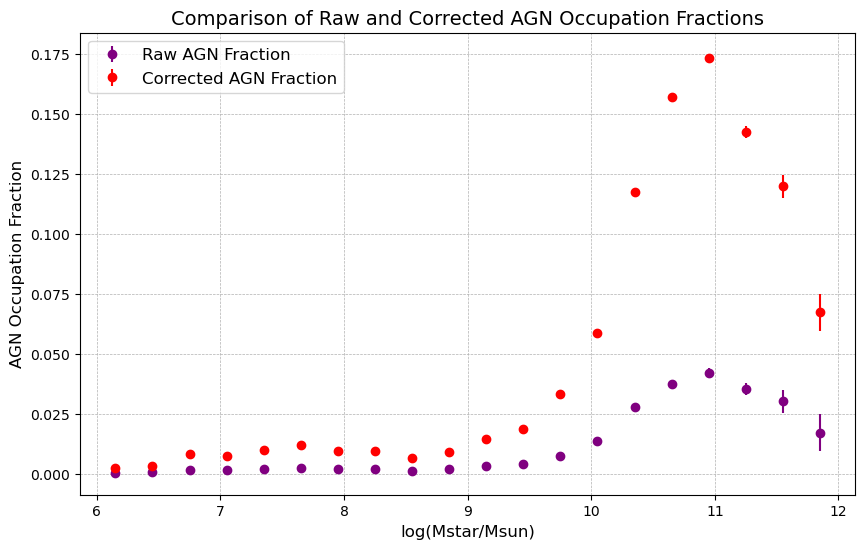

In [90]:
bins_centers = []
fractions = []
errors = []

i = 6
binsize = 0.3

while i < 12:
    # Conditions for galaxies and AGNs in the current bin
    w1 = (np.log10(Mstar_gal1) > i) & (np.log10(Mstar_gal1) < i + binsize) & (z1 < 1)
    w2 = (np.log10(Mstar_agn1) > i) & (np.log10(Mstar_agn1) < i + binsize) & (
        (reliable_agn1 == 1) | (flagXray_agn1 == 1) | 
        (flag_S051 == 1) | (flag_L071 == 1) | (flag_D121 == 1)
    ) & (z1 < 1)
    
    # Count galaxies and AGNs
    icount_gal = len(Mstar_gal1[w1])
    icount_agn = len(Mstar_agn1[w2])
    
    # Raw AGN fraction
    frac = icount_agn / icount_gal if icount_gal > 0 else 0
    avg_error = np.sqrt(frac * (1 - frac) / icount_gal) if icount_gal > 0 else 0
    
    bins_centers.append(i + 0.5 * binsize)
    fractions.append(frac)
    errors.append(avg_error)
    
    i += binsize

# Convert raw AGN fraction data to arrays
raw_bins_array = np.array(bins_centers)
raw_fractions_array = np.array(fractions)
raw_errors_array = np.array(errors)

# --- Corrected AGN Fraction Calculation ---
bins_list = []
corrected_frac_list = []
y_err_list = []

# Exponential fit function from completeness plot
def exponential_fit(x, b, c):
    a = (0.125 - c) / np.exp(b * 9.25)  # Ensure continuity at log(Mstar) = 9.25
    return a * np.exp(b * x) + c

# Parameters from completeness plot (replace these with actual values)
popt = [0.1, 0.05]

for bin_center, raw_frac, raw_err in zip(raw_bins_array, raw_fractions_array, raw_errors_array):
    # Skip bins with zero fraction
    if raw_frac == 0:
        continue
    
    # Evaluate the completeness correction factor
    if bin_center < 9.25:
        correction_factor = 0.125
    else:
        correction_factor = max(min(exponential_fit(bin_center, *popt), 1),.1)
    
    # Correct the raw fraction
    corrected_frac = (raw_frac + raw_frac / correction_factor) / 2
    corrected_frac_list.append(corrected_frac)
    y_err_list.append(raw_err)  # Use the same error as the raw fraction

    bins_list.append(bin_center)

# Convert lists to arrays for plotting
corrected_bins_array = np.array(bins_list)
corrected_frac_array = np.array(corrected_frac_list)
corrected_y_err_array = np.array(y_err_list)
plt.figure(figsize=(10, 6))

# Plot the raw AGN fraction with error bars
plt.errorbar(
    raw_bins_array, raw_fractions_array, yerr=raw_errors_array,
    fmt='o', color='purple', label='Raw AGN Fraction'
)

# Plot the corrected AGN fraction with error bars
plt.errorbar(
    corrected_bins_array, corrected_frac_array, yerr=corrected_y_err_array,
    fmt='o', color='red', label='Corrected AGN Fraction'
)

# Customize the plot
plt.xlabel("log(Mstar/Msun)", fontsize=12)
plt.ylabel("AGN Occupation Fraction", fontsize=12)
plt.title("Comparison of Raw and Corrected AGN Occupation Fractions", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig("Comparison of Raw and Corrected AGN Occupation Fractions.png", dpi=300, bbox_inches='tight')
plt.show()

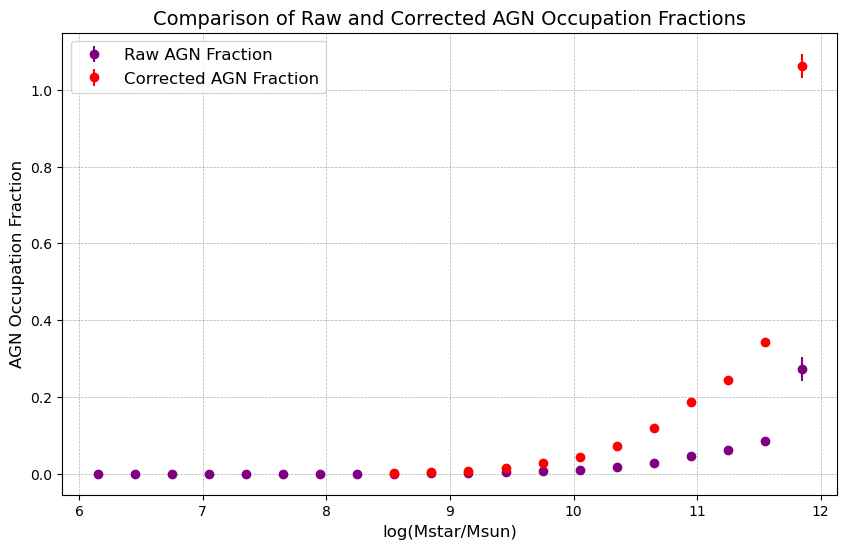

In [92]:
bins_centers = []
fractions = []
errors = []

i = 6
binsize = 0.3

while i < 12:
    # Conditions for galaxies and AGNs in the current bin
    w1 = (np.log10(Mstar_gal1) > i) & (np.log10(Mstar_gal1) < i + binsize) & (z1 > 1) & (z1 < 3)
    w2 = (np.log10(Mstar_agn1) > i) & (np.log10(Mstar_agn1) < i + binsize) & (
        (reliable_agn1 == 1) | (flagXray_agn1 == 1) | 
        (flag_S051 == 1) | (flag_L071 == 1) | (flag_D121 == 1)
    ) & (z1 > 1) & (z1 < 3)
    
    # Count galaxies and AGNs
    icount_gal = len(Mstar_gal1[w1])
    icount_agn = len(Mstar_agn1[w2])
    
    # Raw AGN fraction
    frac = icount_agn / icount_gal if icount_gal > 0 else 0
    avg_error = np.sqrt(frac * (1 - frac) / icount_gal) if icount_gal > 0 else 0
    bins_centers.append(i + 0.5 * binsize)
    fractions.append(frac)
    errors.append(avg_error)
    
    i += binsize

# Convert raw AGN fraction data to arrays
raw_bins_array = np.array(bins_centers)
raw_fractions_array = np.array(fractions)
raw_errors_array = np.array(errors)

# --- Corrected AGN Fraction Calculation ---
bins_list = []
corrected_frac_list = []
y_err_list = []

# Exponential fit function from completeness plot
def exponential_fit(x, b, c):
    a = (0.125 - c) / np.exp(b * 9.25)  # Ensure continuity at log(Mstar) = 9.25
    return a * np.exp(b * x) + c

# Parameters from completeness plot (replace these with actual values)
popt = [0.1, 0.05]

for bin_center, raw_frac, raw_err in zip(raw_bins_array, raw_fractions_array, raw_errors_array):
    # Skip bins with zero fraction
    if raw_frac == 0:
        continue
    
    # Evaluate the completeness correction factor
    if bin_center < 9.25:
        correction_factor = 0.125
    else:
        correction_factor = max(min(exponential_fit(bin_center, *popt), 1),.1)
    
    # Correct the raw fraction
    corrected_frac = (raw_frac + raw_frac / correction_factor) / 2
    corrected_frac_list.append(corrected_frac)
    y_err_list.append(raw_err)  # Use the same error as the raw fraction

    bins_list.append(bin_center)

# Convert lists to arrays for plotting
corrected_bins_array = np.array(bins_list)
corrected_frac_array = np.array(corrected_frac_list)
corrected_y_err_array = np.array(y_err_list)
plt.figure(figsize=(10, 6))

# Plot the raw AGN fraction with error bars
plt.errorbar(
    raw_bins_array, raw_fractions_array, yerr=raw_errors_array,
    fmt='o', color='purple', label='Raw AGN Fraction'
)

# Plot the corrected AGN fraction with error bars
plt.errorbar(
    corrected_bins_array, corrected_frac_array, yerr=corrected_y_err_array,
    fmt='o', color='red', label='Corrected AGN Fraction'
)

# Customize the plot
plt.xlabel("log(Mstar/Msun)", fontsize=12)
plt.ylabel("AGN Occupation Fraction", fontsize=12)
plt.title("Comparison of Raw and Corrected AGN Occupation Fractions", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig("Comparison of Raw and Corrected AGN Occupation Fractions.png", dpi=300, bbox_inches='tight')
plt.show()